### Do it! 실습 | 성별 변수 검토 및 전처리하기

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [27]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [28]:
welfare['sex'].dtypes # 변수 타입 출력

dtype('float64')

In [29]:
welfare['sex'].value_counts() # 빈도 구하기

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [30]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [31]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

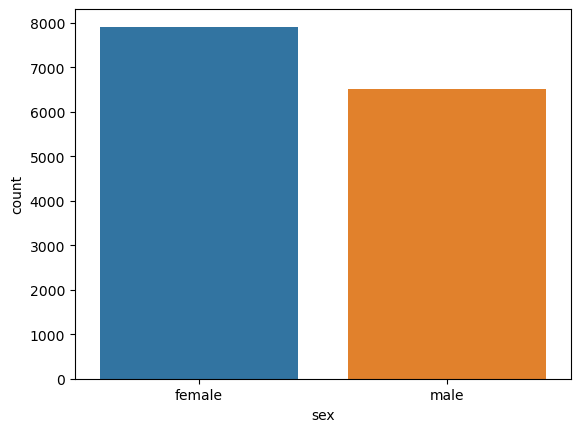

In [33]:
# 빈도 막대 그래프 만들기
sns.countplot(data= welfare, x='sex', hue='sex')

### Do it! 실습 | 월급 변수 검토 전처리 하기

In [34]:
welfare['income'].dtypes # 변수 타입 출력

dtype('float64')

In [35]:
welfare['income'].describe() # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Count'>

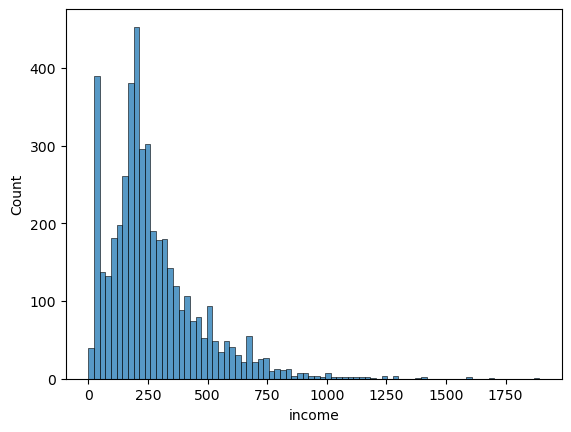

In [38]:
sns.histplot(data=welfare, x='income')

In [39]:
welfare['income'].describe()  # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [40]:
welfare['income'].isna().sum() # 결측치 확인

9884

In [41]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

### Do it! 실습 | 성별에 따른 월급 차이 분석하기

In [42]:
# 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

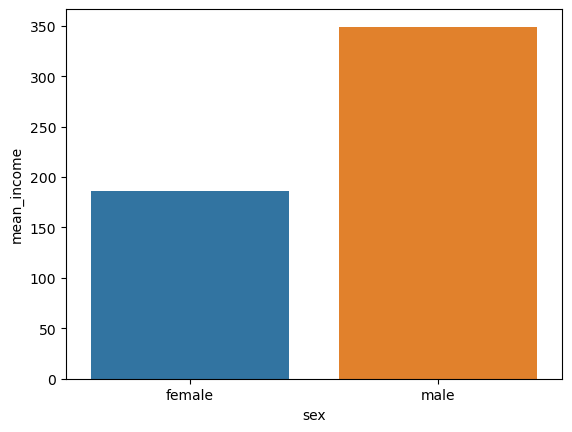

In [47]:
# 막대 그래프 만들기
sns.barplot(data=sex_income, x='sex', y='mean_income', hue='sex')